# Couple model

### Setup

In [1]:
from consav import runtools
runtools.write_numba_config(disable=0,threads=4)

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Local modules
from Model import RetirementClass
import funs
import figs
import transitions
import SimulatedMinimumDistance as SMD

# Global modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

### Solve and simulate model

In [2]:
CoupleEst,SingleEst = SMD.load_est(name='Couple',couple=True)
tic1 = time.time()
Couple = RetirementClass(couple=True, single_kwargs=SingleEst, **CoupleEst)
tic2 = time.time()
Couple.solve()
tic3 = time.time()
Couple.simulate(tax=True)
tic4 = time.time()
Couple.recompute()
tic5 = time.time()
print('Class     :', round(tic2-tic1,2))
print('Solve     :', round(tic3-tic2,2))
print('Simulate  :', round(tic4-tic3,2))
print('Precompute:', round(tic5-tic4,2))

Class     : 177.52
Solve     : 112.04
Simulate  : 124.95
Precompute: 58.15


In [3]:
tic1 = time.time()
Couple.solve()
tic2 = time.time()
Couple.simulate(tax=True)
tic3 = time.time()
print('Solve     :', round(tic2-tic1,2))
print('Simulate  :', round(tic3-tic2,2))

Solve     : 20.27
Simulate  : 10.97


### Retirement probabilities from solution

Women

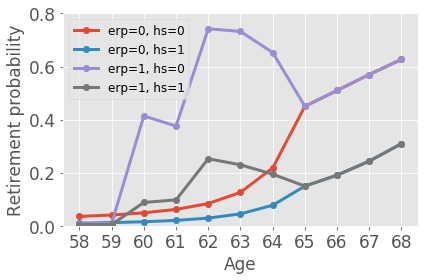

In [4]:
G = figs.choice_probs_c(Couple,ma=0)
G['legendsize'] = 12
G['marker'] = 'o'
figs.MyPlot(G,ylim=[0,0.8],linewidth=3).savefig('figs/Model/Couple_ChoiceProb_Women.png')

Men

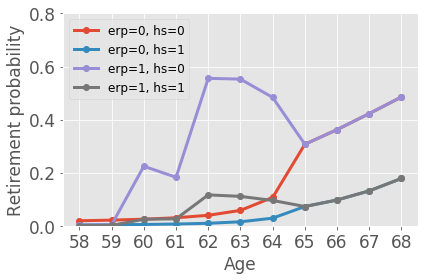

In [5]:
G = figs.choice_probs_c(Couple,ma=1,ad=0)
G['legendsize'] = 12
G['marker'] = 'o'
figs.MyPlot(G,ylim=[0,0.8],linewidth=3).savefig('figs/Model/Couple_ChoiceProb_Men.png')

### Simulation - Retirement

In [6]:
def rename(G_lst):
    G_lst[0]['label'] = ['High skilled']
    G_lst[1]['label'] = ['Base']
    G_lst[2]['label'] = ['Low skilled']

Women

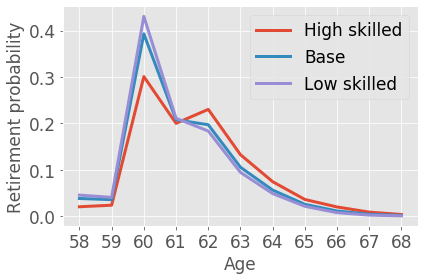

In [7]:
G_hs = figs.retirement_probs_c(Couple,ma=0,ST_w=[1,3])
G_base = figs.retirement_probs_c(Couple,ma=0)
G_ls = figs.retirement_probs_c(Couple,ma=0,ST_w=[0,2])
rename([G_hs,G_base,G_ls])
figs.MyPlot([G_hs,G_base,G_ls],linewidth=3,save=False)

Men

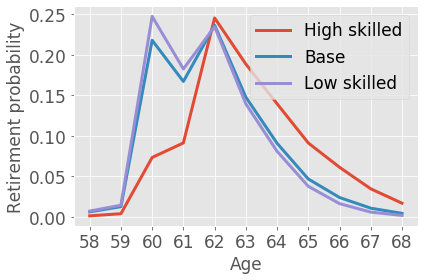

In [8]:
G_hs = figs.retirement_probs_c(Couple,ma=1,ST_h=[1,3])
G_base = figs.retirement_probs_c(Couple,ma=1)
G_ls = figs.retirement_probs_c(Couple,ma=1,ST_h=[0,2])
rename([G_hs,G_base,G_ls])
figs.MyPlot([G_hs,G_base,G_ls],linewidth=3,save=False)

### Simulation - Consumption

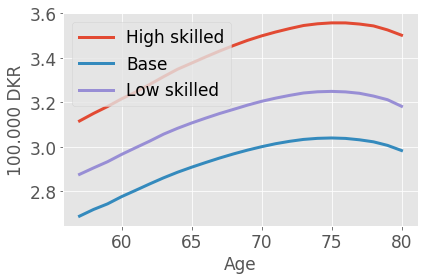

In [11]:
G_hs = figs.lifecycle_c(Couple,var='c',ST_w=[1,3],ST_h=[1,3],ages=[57,80])
G_base = figs.lifecycle_c(Couple,var='c',ages=[57,80])
G_ls = figs.lifecycle_c(Couple,var='c',ST_w=[0,2],ST_h=[1,3],ages=[57,80])
rename([G_hs,G_base,G_ls])
figs.MyPlot([G_hs,G_base,G_ls],linewidth=3,save=False)

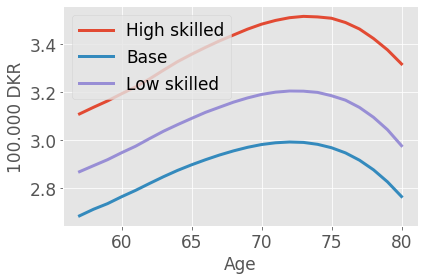

In [9]:
G_hs = figs.lifecycle_c(Couple,var='c',ST_w=[1,3],ST_h=[1,3],ages=[57,80])
G_base = figs.lifecycle_c(Couple,var='c',ages=[57,80])
G_ls = figs.lifecycle_c(Couple,var='c',ST_w=[0,2],ST_h=[1,3],ages=[57,80])
rename([G_hs,G_base,G_ls])
figs.MyPlot([G_hs,G_base,G_ls],linewidth=3,save=False)

### Simulation - Wealth

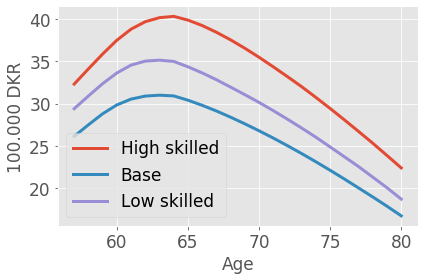

In [12]:
G_hs = figs.lifecycle_c(Couple,var='m',ST_w=[1,3],ST_h=[1,3],ages=[57,80])
G_base = figs.lifecycle_c(Couple,var='m',ages=[57,80])
G_ls = figs.lifecycle_c(Couple,var='m',ST_w=[0,2],ST_h=[1,3],ages=[57,80])
rename([G_hs,G_base,G_ls])
figs.MyPlot([G_hs,G_base,G_ls],linewidth=3,save=False)

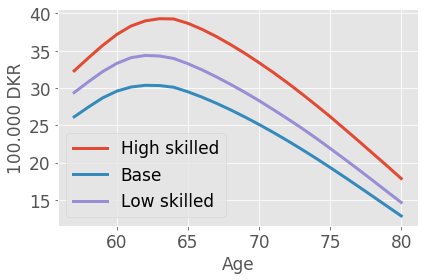

In [10]:
G_hs = figs.lifecycle_c(Couple,var='m',ST_w=[1,3],ST_h=[1,3],ages=[57,80])
G_base = figs.lifecycle_c(Couple,var='m',ages=[57,80])
G_ls = figs.lifecycle_c(Couple,var='m',ST_w=[0,2],ST_h=[1,3],ages=[57,80])
rename([G_hs,G_base,G_ls])
figs.MyPlot([G_hs,G_base,G_ls],linewidth=3,save=False)

# Time the model and simulation

In [46]:
Couple.par.simT=12
Couple.recompute()

In [ ]:
def solve():
    Couple.solve() 
    
def simulate():
    Couple.simulate()
    
funcs = [solve,simulate]
argu = dict([(funcs[0], []),
             (funcs[1], [])])
names = dict([(funcs[0], 'solve: #a=' + str(Couple.par.Na)),
              (funcs[1], 'simulate: T=12, N=' + str(Couple.par.simN))])

In [ ]:
funs.my_timer(funcs,argu,names,unit='s',ndigits=2,Ntimes=50)

# Consumption and value functions

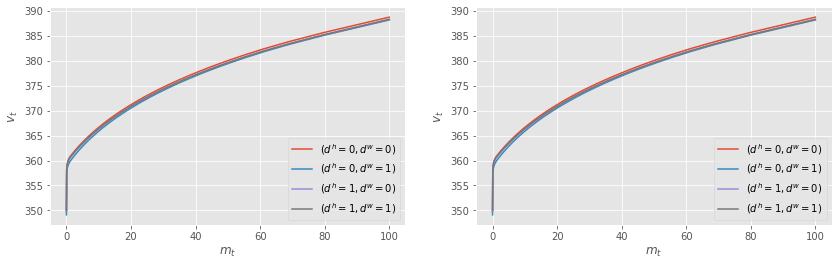

In [5]:
fig, axs = plt.subplots(1,2,figsize=(14,4))
figs.policy_c(Couple,axs[0],var='v',T=[15],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0,1],D_w=[0,1],label=['d'])#,xlim=[0,20],ylim=[445,460],bottom=1)
figs.policy_c(Couple,axs[1],var='v',T=[15],AD=[0],ST_h=[1],ST_w=[1],RA_h=[2],RA_w=[2],D_h=[0,1],D_w=[0,1],label=['d'])#,xlim=[0,20],ylim=[445,460],bottom=1)
plt.show()

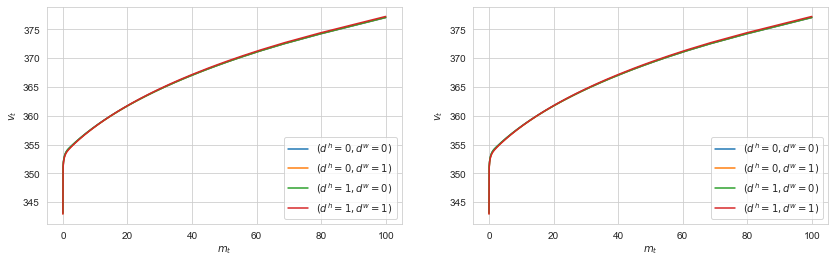

In [38]:
fig, axs = plt.subplots(1,2,figsize=(14,4))
figs.policy_c(test,axs[0],var='v',T=[15],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0,1],D_w=[0,1],label=['d'])#,xlim=[0,20],ylim=[445,460],bottom=1)
figs.policy_c(test,axs[1],var='v',T=[15],AD=[0],ST_h=[1],ST_w=[1],RA_h=[2],RA_w=[2],D_h=[0,1],D_w=[0,1],label=['d'])#,xlim=[0,20],ylim=[445,460],bottom=1)
plt.show()

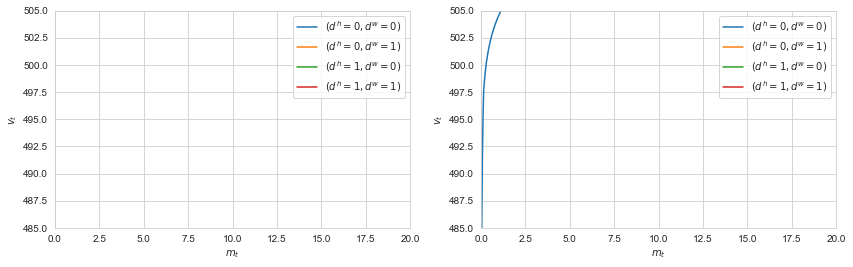

In [39]:
fig, axs = plt.subplots(1,2,figsize=(14,4))
figs.policy_c(test,axs[0],var='v',T=[4],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0,1],D_w=[0,1],label=['d'],xlim=[0,20],ylim=[485,505],bottom=1)
figs.policy_c(test,axs[1],var='v',T=[4],AD=[0],ST_h=[1],ST_w=[1],RA_h=[2],RA_w=[2],D_h=[0,1],D_w=[0,1],label=['d'],xlim=[0,20],ylim=[485,505],bottom=1)
plt.show()

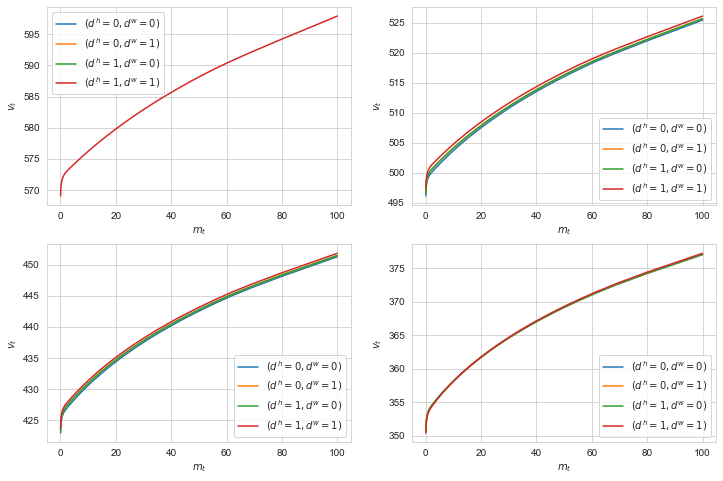

In [40]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
time = list(range(20))
figs.policy_c(test,axs[0,0],var='v',T=[0],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0,1],D_w=[0,1],label=['d'],bottom=1)
figs.policy_c(test,axs[0,1],var='v',T=[5],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0,1],D_w=[0,1],label=['d'],bottom=1)
figs.policy_c(test,axs[1,0],var='v',T=[10],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0,1],D_w=[0,1],label=['d'],bottom=1)
figs.policy_c(test,axs[1,1],var='v',T=[15],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0,1],D_w=[0,1],label=['d'],bottom=1)
plt.show()

### We consider a household with zero age difference, where both are low skilled and no erp

### d_h=d_w=0

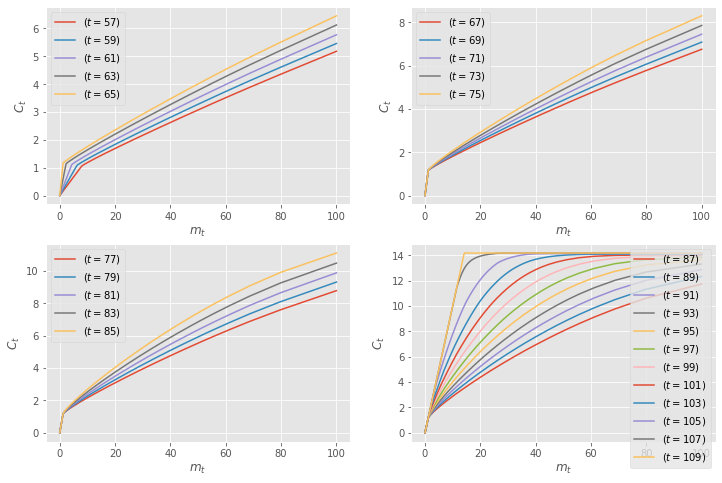

In [6]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
time = list(range(10))
figs.policy_c(Couple,axs[0,0],var='c',T=time[::2],AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[0],D_w=[0],label=['t'])
time = list(range(10,20))
figs.policy_c(Couple,axs[0,1],var='c',T=time[::2],AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[0],D_w=[0],label=['t'])
time = list(range(20,30))
figs.policy_c(Couple,axs[1,0],var='c',T=time[::2],AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[0],D_w=[0],label=['t'])
time = list(range(30,54))
figs.policy_c(Couple,axs[1,1],var='c',T=time[::2],AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[0],D_w=[0],label=['t'])
plt.show()

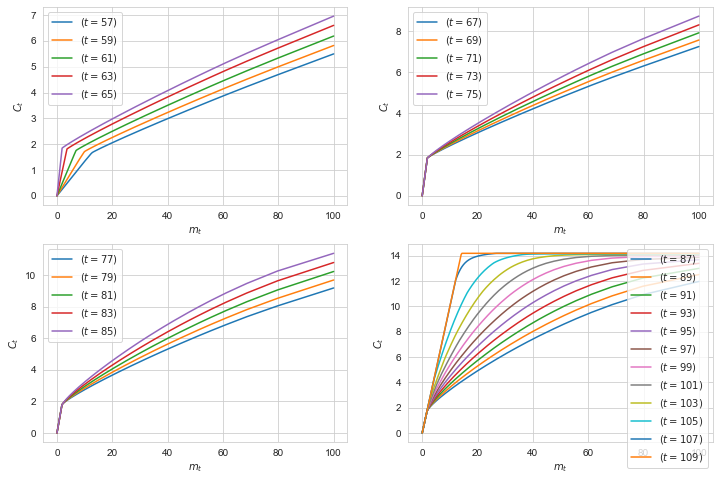

In [41]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
time = list(range(10))
figs.policy_c(test,axs[0,0],var='c',T=time[::2],AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[0],D_w=[0],label=['t'])
time = list(range(10,20))
figs.policy_c(test,axs[0,1],var='c',T=time[::2],AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[0],D_w=[0],label=['t'])
time = list(range(20,30))
figs.policy_c(test,axs[1,0],var='c',T=time[::2],AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[0],D_w=[0],label=['t'])
time = list(range(30,54))
figs.policy_c(test,axs[1,1],var='c',T=time[::2],AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[0],D_w=[0],label=['t'])
plt.show()

### d_h=0 and d_w=1

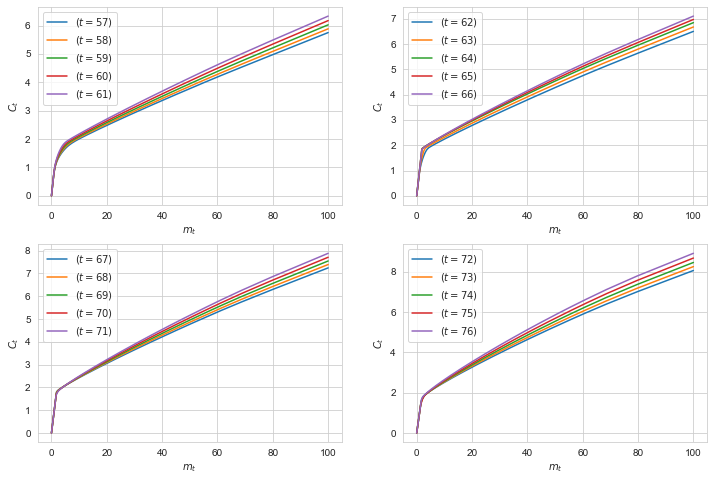

In [42]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
time = list(range(5))
figs.policy_c(test,axs[0,0],var='c',T=time,AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[0],D_w=[1],label=['t'])
time = list(range(5,10))
figs.policy_c(test,axs[0,1],var='c',T=time,AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[0],D_w=[1],label=['t'])
time = list(range(10,15))
figs.policy_c(test,axs[1,0],var='c',T=time,AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[0],D_w=[1],label=['t'])
time = list(range(15,20))
figs.policy_c(test,axs[1,1],var='c',T=time,AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[0],D_w=[1],label=['t'])
plt.show()

### d_h = 1 and d_w = 0

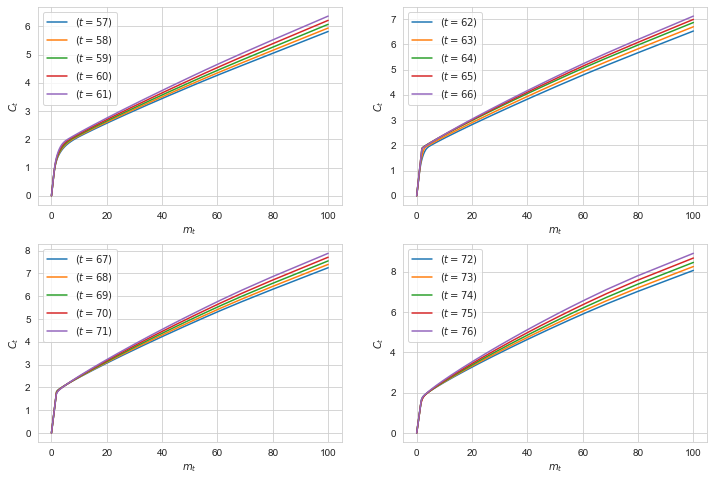

In [43]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
time = list(range(5))
figs.policy_c(test,axs[0,0],var='c',T=time,AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[1],D_w=[0],label=['t'])
time = list(range(5,10))
figs.policy_c(test,axs[0,1],var='c',T=time,AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[1],D_w=[0],label=['t'])
time = list(range(10,15))
figs.policy_c(test,axs[1,0],var='c',T=time,AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[1],D_w=[0],label=['t'])
time = list(range(15,20))
figs.policy_c(test,axs[1,1],var='c',T=time,AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[1],D_w=[0],label=['t'])
plt.show()

### d_h = d_w = 1

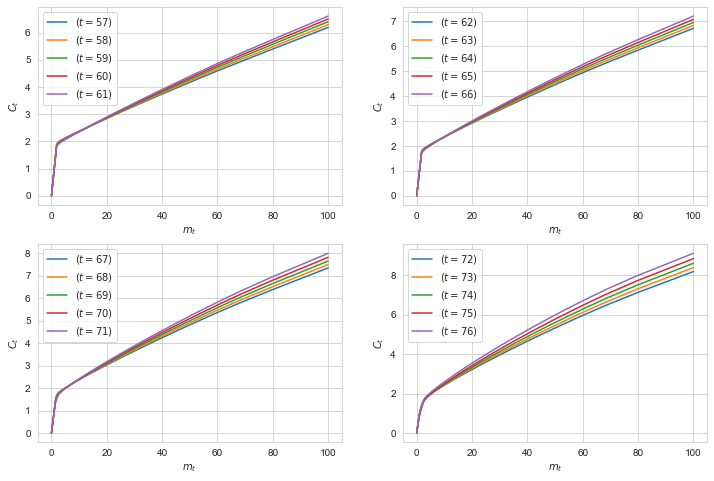

In [27]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
time = list(range(5))
figs.policy_c(test,axs[0,0],var='c',T=time,AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[1],D_w=[1],label=['t'])
time = list(range(5,10))
figs.policy_c(test,axs[0,1],var='c',T=time,AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[1],D_w=[1],label=['t'])
time = list(range(10,15))
figs.policy_c(test,axs[1,0],var='c',T=time,AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[1],D_w=[1],label=['t'])
time = list(range(15,20))
figs.policy_c(test,axs[1,1],var='c',T=time,AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[1],D_w=[1],label=['t'])
plt.show()

### Now we consider a household with erp and high skilled

### d_h=d_w=0

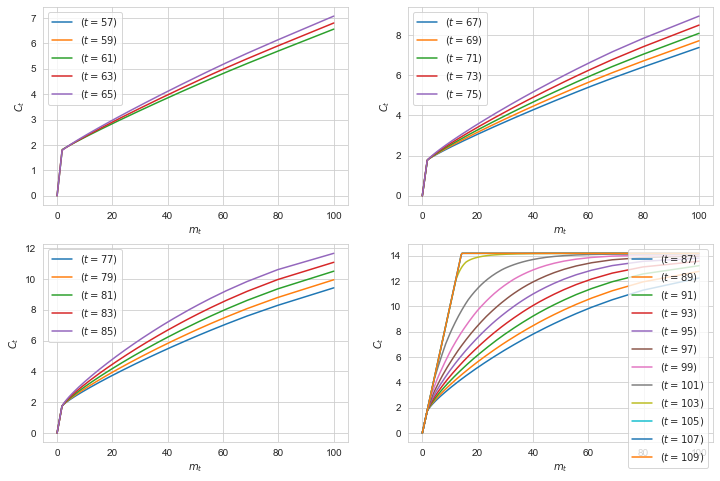

In [30]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
time = list(range(10))
figs.policy_c(test,axs[0,0],var='c',T=time[::2],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0],D_w=[0],label=['t'])
time = list(range(10,20))
figs.policy_c(test,axs[0,1],var='c',T=time[::2],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0],D_w=[0],label=['t'])
time = list(range(20,30))
figs.policy_c(test,axs[1,0],var='c',T=time[::2],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0],D_w=[0],label=['t'])
time = list(range(30,54))
figs.policy_c(test,axs[1,1],var='c',T=time[::2],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0],D_w=[0],label=['t'])
plt.show()

### d_h=0 and d_w=1

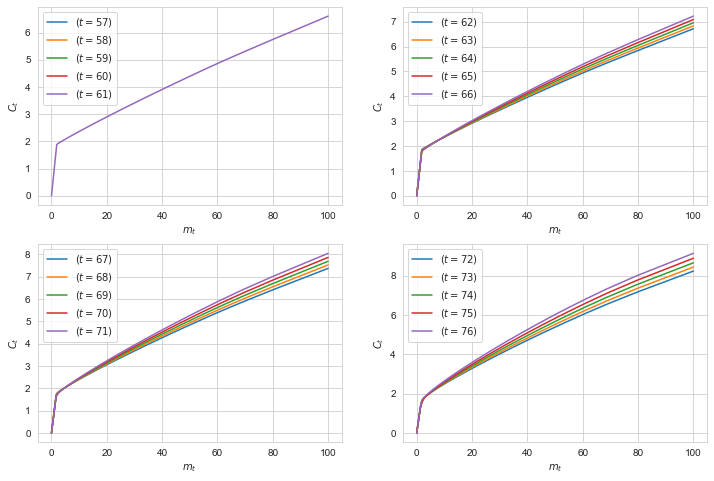

In [31]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
time = list(range(5))
figs.policy_c(test,axs[0,0],var='c',T=time,AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0],D_w=[1],label=['t'])
time = list(range(5,10))
figs.policy_c(test,axs[0,1],var='c',T=time,AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0],D_w=[1],label=['t'])
time = list(range(10,15))
figs.policy_c(test,axs[1,0],var='c',T=time,AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0],D_w=[1],label=['t'])
time = list(range(15,20))
figs.policy_c(test,axs[1,1],var='c',T=time,AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0],D_w=[1],label=['t'])
plt.show()

### d_h = d_w = 1

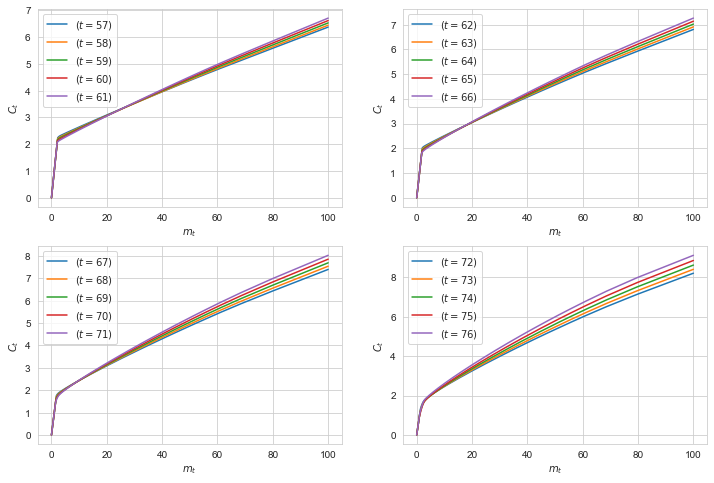

In [33]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
time = list(range(5))
figs.policy_c(test,axs[0,0],var='c',T=time,AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[1],D_w=[1],label=['t'])
time = list(range(5,10))
figs.policy_c(test,axs[0,1],var='c',T=time,AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[1],D_w=[1],label=['t'])
time = list(range(10,15))
figs.policy_c(test,axs[1,0],var='c',T=time,AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[1],D_w=[1],label=['t'])
time = list(range(15,20))
figs.policy_c(test,axs[1,1],var='c',T=time,AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[1],D_w=[1],label=['t'])
plt.show()

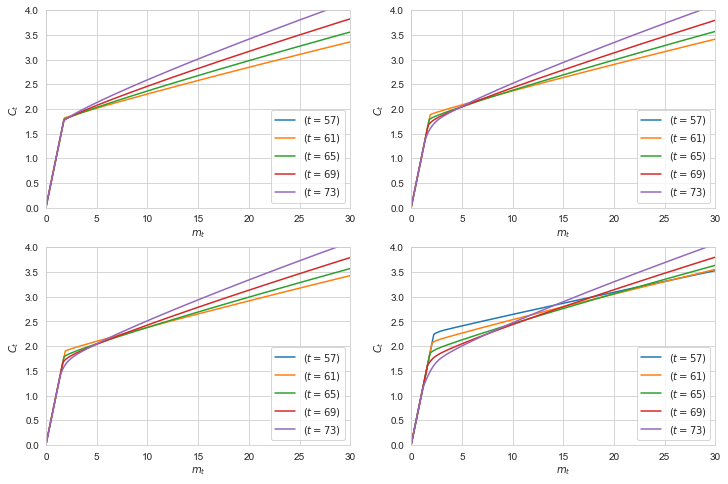

In [34]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
time = list(range(20))
figs.policy_c(test,axs[0,0],var='c',T=time[::4],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0],D_w=[0],label=['t'],xlim=[0,30],ylim=[0,4])
figs.policy_c(test,axs[0,1],var='c',T=time[::4],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0],D_w=[1],label=['t'],xlim=[0,30],ylim=[0,4])
figs.policy_c(test,axs[1,0],var='c',T=time[::4],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[1],D_w=[0],label=['t'],xlim=[0,30],ylim=[0,4])
figs.policy_c(test,axs[1,1],var='c',T=time[::4],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[1],D_w=[1],label=['t'],xlim=[0,30],ylim=[0,4])
plt.show()

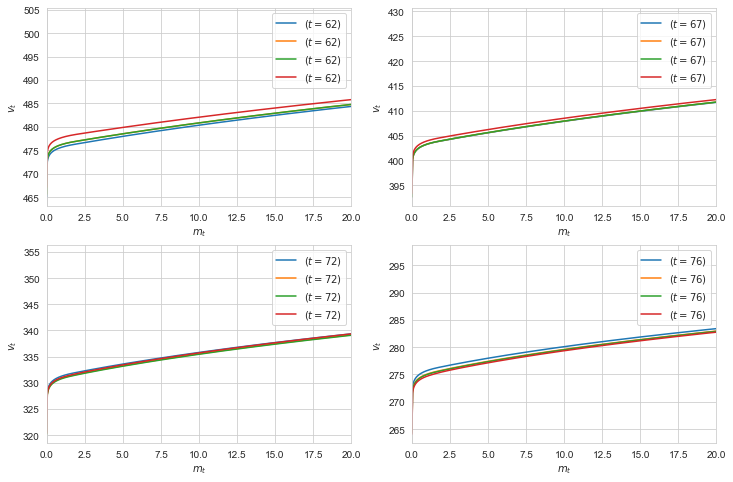

In [35]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
figs.policy_c(test,axs[0,0],var='v',T=[5],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0,1],D_w=[0,1],label=['t'], xlim=[0,20])
figs.policy_c(test,axs[0,1],var='v',T=[10],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0,1],D_w=[0,1],label=['t'], xlim=[0,20])
figs.policy_c(test,axs[1,0],var='v',T=[15],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0,1],D_w=[0,1],label=['t'], xlim=[0,20])
figs.policy_c(test,axs[1,1],var='v',T=[19],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0,1],D_w=[0,1],label=['t'], xlim=[0,20])
plt.show()

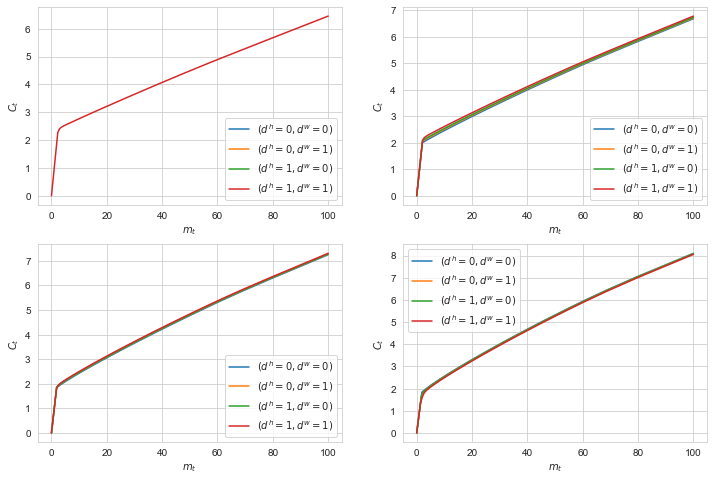

In [18]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
time = list(range(20))
figs.policy_c(test,axs[0,0],var='c',T=[0],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0,1],D_w=[0,1],label=['d'])
figs.policy_c(test,axs[0,1],var='c',T=[5],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0,1],D_w=[0,1],label=['d'])
figs.policy_c(test,axs[1,0],var='c',T=[10],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0,1],D_w=[0,1],label=['d'])
figs.policy_c(test,axs[1,1],var='c',T=[15],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0,1],D_w=[0,1],label=['d'])
plt.show()

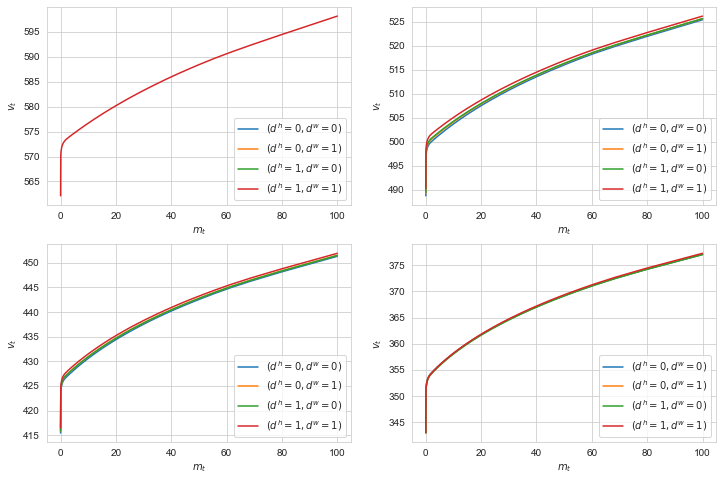

In [19]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
time = list(range(20))
figs.policy_c(test,axs[0,0],var='v',T=[0],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0,1],D_w=[0,1],label=['d'])
figs.policy_c(test,axs[0,1],var='v',T=[5],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0,1],D_w=[0,1],label=['d'])
figs.policy_c(test,axs[1,0],var='v',T=[10],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0,1],D_w=[0,1],label=['d'])
figs.policy_c(test,axs[1,1],var='v',T=[15],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0,1],D_w=[0,1],label=['d'])
plt.show()